In [ ]:
#Data analysis   
import pandas as pd 
import numpy as np
import csv
import nltk
import tensorflow as tf

#Data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
from matplotlib import ticker
%config InlineBackend.figure_format = 'svg'

In [ ]:
import pandas as pd

dataset = pd.read_csv("singgalang.tsv", header = None, delimiter="\t", names=['token', 'entitas'], quoting=csv.QUOTE_NONE, encoding='utf-8')

In [ ]:
len(dataset)

1431645

In [ ]:
len(dataset['token'])

1431645

In [ ]:
dataset.head()

,token,entitas
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O


In [ ]:
d = pd.read_csv("singgalang.tsv", header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(d, test_size=0.2, shuffle=False)

In [ ]:
train.head(30)

,0,1
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O
5,Mesir,PLACE
6,pada,O
7,periode,O
8,15,O
9,Oktober,O


In [ ]:
test.head(30)

,0,1
1145316,-RSB-,O
1145317,.,O
1145318,Devonshire,O
1145319,sendiri,O
1145320,sangat,O
1145321,tertarik,O
1145322,dengan,O
1145323,hortikultura,O
1145324,dan,O
1145325,diangkat,O


# Perbandingan jumlah token ambigu dengan unique token

In [ ]:
dt = dataset.copy()
print(len(dt))

1431645


In [ ]:
dt['distinctentitas'] = dt['token'].map(dataset.groupby('token')['entitas'].nunique(dropna = True))

In [ ]:
len(dt)

1431645

In [ ]:
dt.head(30)

,token,entitas,distinctentitas
0,Ia,O,1.0
1,menjabat,O,1.0
2,sebagai,O,1.0
3,Presiden,O,3.0
4,ketiga,O,1.0
5,Mesir,PLACE,2.0
6,pada,O,1.0
7,periode,O,1.0
8,15,O,1.0
9,Oktober,O,1.0


In [ ]:
#Token yang ambigu
print('jumlah token ambigu: ',len(ambigu))
#Kata Kata yang ambigu
print('jumlah kata ambigu: ',ambigu['token'].nunique())

jumlah token ambigu:  302150
jumlah kata ambigu:  4957


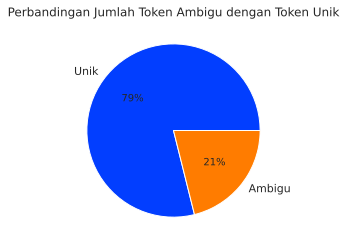

In [ ]:

# importing libraries
import matplotlib.pyplot as plt
import seaborn
  
# declaring data
value = [len(dataset)-len(ambigu), len(ambigu)]
keys = ['Unik', 'Ambigu']
  
# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')
  
# plotting data on chart
plt.pie(value, labels=keys, colors=palette_color, autopct='%.0f%%')

# Define title on chart
plt.title('Perbandingan Jumlah Token Ambigu dengan Token Unik')
  
# displaying chart
plt.show()

# Perbandingan jumlah token tiap kelompok jumlah duplikasi entitas

In [ ]:
data = dataset.copy()
print(len(data))

1431645


In [ ]:
data.head(10)

,token,entitas
0,Ia,O
1,menjabat,O
2,sebagai,O
3,Presiden,O
4,ketiga,O
5,Mesir,PLACE
6,pada,O
7,periode,O
8,15,O
9,Oktober,O


In [ ]:
data['distinctentitas'] = data['token'].map(dataset.groupby('token')['entitas'].nunique(dropna = True))

In [ ]:
viz = data.groupby(['distinctentitas'])['token'].count()

In [ ]:
viz

distinctentitas
1.0    1129495
2.0     204144
3.0      83482
4.0      14504
Name: token, dtype: int64

In [ ]:
sum(viz)

1431625

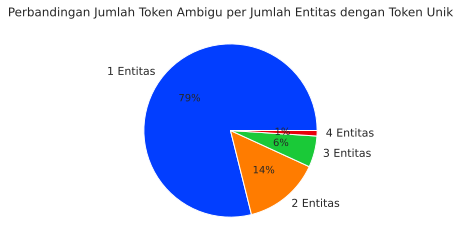

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn
  
# declaring data
value = viz
keys = ['1 Entitas', '2 Entitas', '3 Entitas', '4 Entitas']
  
# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')
  
# plotting data on chart
plt.pie(value, labels=keys, colors=palette_color, autopct='%.0f%%')

# Define title on chart
plt.title('Perbandingan Jumlah Token Ambigu per Jumlah Entitas dengan Token Unik')

# displaying chart
plt.show()

#Menghitung frasa

In [ ]:
df = pd.read_csv("SINGGALANG2.tsv", header = None, delimiter="\t", names=['token', 'entitas'], quoting=csv.QUOTE_NONE, encoding='utf-8')

In [ ]:
df.head(10)

,token,entitas
0,qbal,PERSON
1,berhasil,O
2,mendapatkan,O
3,22.429,O
4,suara,O
5,dalam,O
6,Pemilu,O
7,2009,O
8,di,O
9,daerah,O


In [ ]:
df['token'].mask(df['entitas'] == 'O', '-', inplace=True)

In [ ]:
df.tail(50)

,token,entitas
46573,-,O
46574,-,O
46575,-,O
46576,-,O
46577,-,O
46578,-,O
46579,-,O
46580,-,O
46581,-,O
46582,-,O


In [ ]:
import pandas 
list = []
tmp_list = []
entity = ""

for val in df.itertuples():
  if val.Index == 0: #pada initial val
      tmp_list.append(val.token)
      entity = val.entitas
  else:
    if val.token != "-": #the rest NE val
        if val.entitas == entity: #jika entitas sekarang sama dengan entitas sebelumnya
          tmp_list.append(val.token)
          list.append(tmp_list)
        else: #jika entitas sekarang berbeda dengan entitas sebelumnya
          tmp_list.append(val.token)
          entity = val.entitas
    else: #jika other
        entity = val.entitas
        tmp_list = []

In [ ]:
print(list)

[['Sumatera', 'Barat'], ['Kota', 'Bukittinggi'], ['Kabupaten', 'Agam'], ['Kabupaten', 'Padang', 'Pariaman'], ['Kabupaten', 'Padang', 'Pariaman'], ['Kota', 'Pariaman'], ['Kabupaten', 'Pasaman'], ['Kabupaten', 'Pasaman', 'Barat'], ['Kabupaten', 'Pasaman', 'Barat'], ['Kabupaten', 'Lima', 'Puluh', 'Kota'], ['Kabupaten', 'Lima', 'Puluh', 'Kota'], ['Kabupaten', 'Lima', 'Puluh', 'Kota'], ['Kota', 'Payakumbuh'], ['Amerika', 'Serikat'], ['Alexis', 'Bachelot'], ['Gudang', 'Garam'], ['Partai', 'Keadilan', 'Sejahtera'], ['Partai', 'Keadilan', 'Sejahtera'], ['Irwan', 'Prayitno'], ['Sumatera', 'Barat'], ['Padang', 'Pariaman'], ['Poempida', 'Hidayatulloh'], ['Poempida', 'Hidayatullah'], ['Jeffrie', 'Geovanie'], ['Partai', 'NasDem'], ['Sumatera', 'Barat'], ['Kabupaten', 'Pesisir', 'Selatan'], ['Kabupaten', 'Pesisir', 'Selatan'], ['Kabupaten', 'Kepulauan', 'Mentawai'], ['Kabupaten', 'Kepulauan', 'Mentawai'], ['Kabupaten', 'Solok'], ['Kabupaten', 'Solok', 'Selatan'], ['Kabupaten', 'Solok', 'Selatan'], [

In [ ]:
# jumlah frasa
len(list)

1452

In [ ]:
a=0
for p in list:
    a+=len(p)
print(a)

3692


In [ ]:
#token yang merupakan frasa
print(a/len(df['token']))

0.0791883834159106
